# Feature scaling and Learning Rate (Multi-variable)

### Lab Objectives

- Utilize  the multiple variables routines developed in the notebooks
- Run Gradient Descent algorithm on a data set with multiple features
- Explore the impact of the *learning rate, alpha,* on gradient descent algorithm
- Improve performance of gradient descent by *feature scaling* using z-score normalization as the technique

In [44]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt

## Notations Used

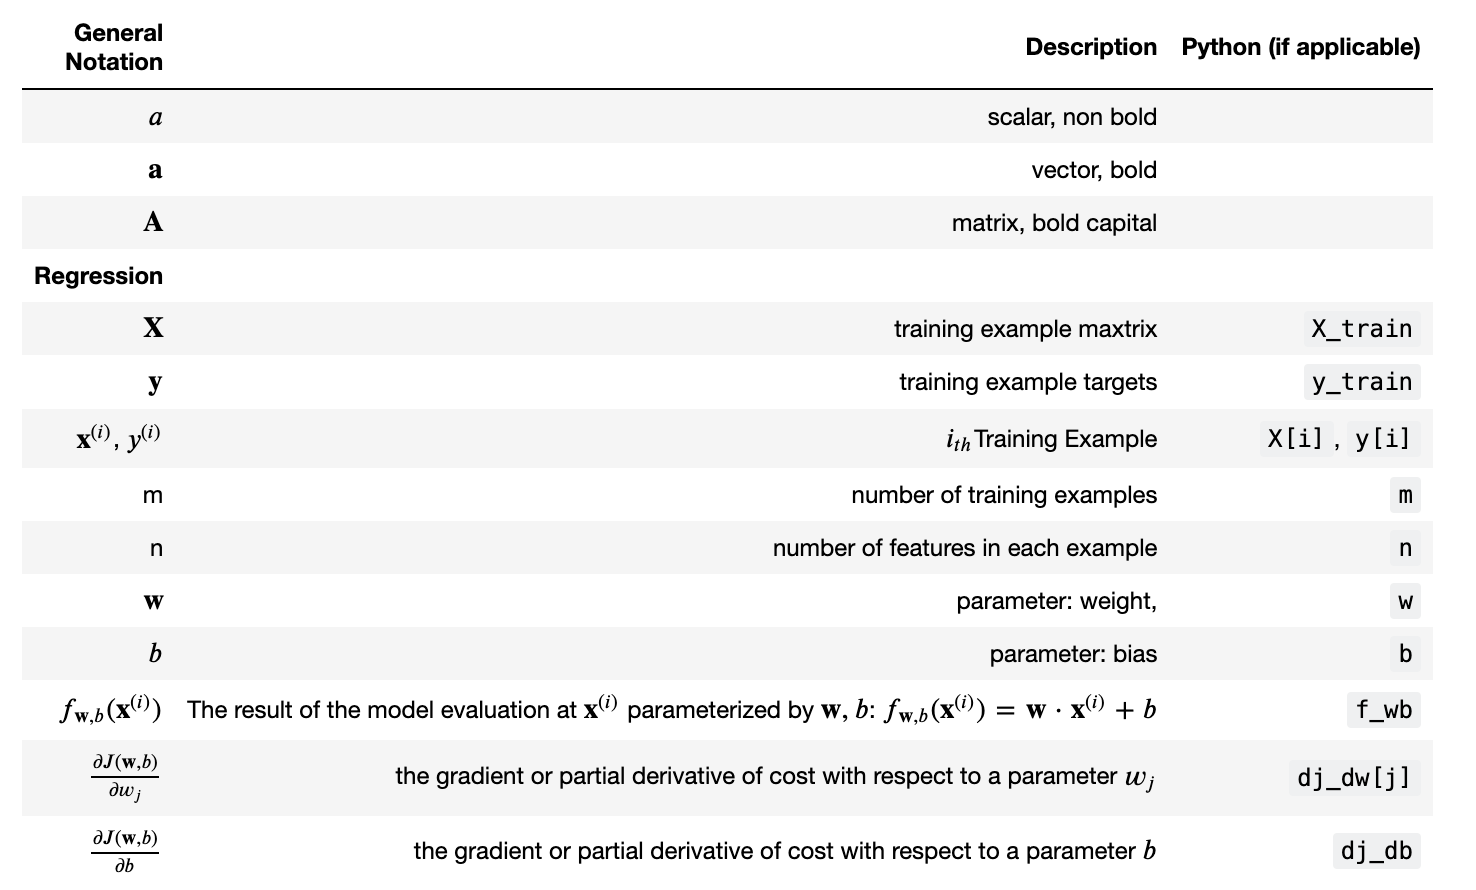

Below common functions used in previous Jupyter Notebooks for Gradient Descent algorith, along with some data, are defined

In [59]:
# Loads some sample minimal dataset and labels or targets for each.
def load_house_data():
    X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
    y_train = np.array([460, 232, 178])
    return X_train, y_train

Model That Predicts a value for Parameters and multiple features:
<br>
                                $$f_{w,b}(x^{(i)}) = w \cdot x^{(i)} + b$$
<br>
Code:


In [60]:
# Predicts a value based parameters vector and features passed 
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter, bias
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p    

Compute Cost Function: 
<br>
                $$ J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$
<br>
Code:

In [61]:
# Computes cost against a dataset of predictions with w params chosen AND dataset with targets provided
# Cost Function Used: SQRT -> (1/2m) * [ Ε(Sum) of (fw_b(i) - y) ** 2 ]
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    # Calculates total cost, per each array for specific choices of 'w's parameters and biased 'b'
    for i in range(m):
        f_wb = predict(X[i], w, b)
        cost = cost + (f_wb - y[i]) ** 2
    cost /= (2 * m)
    return cost

In [62]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression. It computes the gradient in relation to each passed parameter values (w) and
    the bias passed (b). This is then used by the gradient descent algorithm to "refine" both params over iterations.

    Mathematically, it can be interpreted as calculating the partial derivative of each chosen param's cost; for all train examples
    the total non pow2 cost at a particular w.

    Programmatically though, the algorithm operates to accumulate the total gradient for each parameter incrementally, by considering 
    one example at a time and updating the sum of gradients (total error influenced by each feature).
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape # Number of training examples, number of features
    dj_db = 0. # Accumulated value (scalar) of derivative for the cost function J in relation to the bias 'b'
    dj_dw = np.zeros((n,)) # accum vector of derivative values for the cost function J of each feature
    for i in range(m):
      err = (np.dot(X[i], w) + b) - y[i] # err is in fact the non pow 2 cost (J) for a particular choice of w vector and b, per row
      # Inner loop does the derivative per each 'w' parameter with respect to it's affecting 'x' feature.
      for j in range(n):
        dj_dw[j] = dj_dw[j] + err * X[i, j]
      # Calculates in outer loop updated b value, the partial derivative to db, per training data row and adds the value to total
      dj_db += err
    # How numpy works, this divides each parameter column by the training examples total 'm'
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    return dj_dw, dj_db

In [85]:
# Function for the Gradient Descent algorithm, uses above declared functions
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, compute_cost):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter (bias)
      cost_function       : function to compute the cost at each iteration [non strictly necessary]
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters as iterations run
      b (scalar)       : Updated value of parameter as iterations run
    """
    # Initial chosen parameters
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
      # Compute gradients first
      dj_dw, dj_db = compute_gradient(X, y, w, b)
      # Then calculate gradient itself
      w = w - alpha * dj_dw
      b = b - alpha * dj_db
      print(f'Cost for ws: {w} and b: {b} -> Total Cost: {compute_cost(X, y, w, b)}')
    return w, b

In [86]:
X_train, y_train = load_house_data()
b_init = 785.18
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
# Initialize parameters
initial_w = np.zeros_like(w_init)
b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-10
# run gradient descent
w_final, b_final = gradient_descent(X_train, y_train, initial_w, b, alpha, iterations, compute_cost)
m,_ = X_train.shape
for i in range(m):
    # fw_b = w.x + b = prediction, as seen above
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Cost for ws: [2.41334667e-04 5.58666667e-07 1.83666667e-07 6.03500000e-06] and b: 1.4500000000000001e-07 -> Total Cost: 49401.51115102781
Cost for ws: [4.82381246e-04 1.11667037e-06 3.67100363e-07 1.20627092e-05] and b: 2.898240256468334e-07 -> Total Cost: 49285.30024949017
Cost for ws: [7.23140082e-04 1.67401189e-06 5.50301368e-07 1.80831362e-05] and b: 4.344722870072487e-07 -> Total Cost: 49169.36663219243
Cost for ws: [9.63611518e-04 2.23069204e-06 7.33269959e-07 2.40962899e-05] and b: 5.789449938972306e-07 -> Total Cost: 49053.70963752232
Cost for ws: [1.20379590e-03 2.78671159e-06 9.16006413e-07 3.01021788e-05] and b: 7.232423558822993e-07 -> Total Cost: 48938.32860544623
Cost for ws: [1.44369356e-03 3.34207133e-06 1.09851101e-06 3.61008116e-05] and b: 8.673645822778094e-07 -> Total Cost: 48823.22287750539
Cost for ws: [1.68330486e-03 3.89677205e-06 1.28078402e-06 4.20921971e-05] and b: 1.0113118821492488e-06 -> Total Cost: 48708.391796812175
Cost for ws: [1.92263012e-03 4.4508145

Selecting a different learning rate, of $\alpha$ = 9.9e-7, and running again gradient descent:

In [87]:
alpha_2 = 9.9e-7
w_final, b_final = gradient_descent(X_train, y_train, initial_w, b, alpha_2, iterations, compute_cost)
print(f"Parameters calculated for each feature with learning rate: {alpha_2} are, for w vector: {w_final} and for b (bias): {b_final}")
for i in range(m):
    # fw_b = w.x + b = prediction, as seen above
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Cost for ws: [4.7784264e-01 1.1061600e-03 3.6366000e-04 1.1949300e-02] and b: 0.00028710000000000004 -> Total Cost: 91474.09530223049
Cost for ws: [-0.17373202 -0.00038677 -0.00018602 -0.00468432] and b: -0.00011568985415459995 -> Total Cost: 169486.77743906915
Cost for ws: [7.14759763e-01 1.66440235e-03 5.09729291e-04 1.76575803e-02] and b: 0.0004222508862148867 -> Total Cost: 314542.64751260163
Cost for ws: [-4.96773522e-01 -1.11714283e-03 -4.92771474e-04 -1.31472748e-02] and b: -0.000322581732945231 -> Total Cost: 584257.8224014195
Cost for ws: [1.15527438e+00 2.69117651e-03 8.20446193e-04 2.85184926e-02] and b: 0.0006817685215518812 -> Total Cost: 1085763.0233237369
Cost for ws: [-1.09743931e+00 -2.48640286e-03 -1.02403392e-03 -2.86362023e-02] and b: -0.0006990551089992292 -> Total Cost: 2018255.8368319243
Cost for ws: [1.97435574e+00 4.58913344e-03 1.43730466e-03 4.89601037e-02] and b: 0.0011725306691483088 -> Total Cost: 3752121.881888304
Cost for ws: [-2.21431637e+00 -5.04360318

It appears the learning rate is too high.  The solution does not converge. Cost is *increasing* rather than decreasing. It seems, it's likely that at each iteration, it is overshooting the optimal value and as a result, cost ends up increasing rather than approaching the minimum. We can now try a value a bit smaller, such as: $\alpha$ = 1e-7

In [88]:
alpha_2 = 1e-7
w_final, b_final = gradient_descent(X_train, y_train, initial_w, b, alpha_2, 1000, compute_cost)
print(f"Parameters calculated for each feature with learning rate: {alpha_2} are, for w vector: {w_final} and for b (bias): {b_final}")
for i in range(m):
    # fw_b = w.x + b = prediction, as seen above
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Cost for ws: [4.82669333e-02 1.11733333e-04 3.67333333e-05 1.20700000e-03] and b: 2.9e-05 -> Total Cost: 28989.111501449268
Cost for ws: [8.50103762e-02 1.96948039e-04 6.41478694e-05 2.12236727e-03] and b: 5.096102587333333e-05 -> Total Cost: 17092.489165832452
Cost for ws: [1.12981526e-01 2.61975354e-04 8.44684432e-05 2.81572823e-03] and b: 6.756361160867636e-05 -> Total Cost: 10198.319962562271
Cost for ws: [1.34274739e-01 3.11634956e-04 9.93887175e-05 3.34008622e-03] and b: 8.008706899904669e-05 -> Total Cost: 6203.1041591346175
Cost for ws: [1.50484353e-01 3.49595837e-04 1.10197998e-04 3.73579020e-03] and b: 8.95052781770557e-05 -> Total Cost: 3887.8502848155
Cost for ws: [1.62824060e-01 3.78651029e-04 1.17877774e-04 4.03355595e-03] and b: 9.655960846163617e-05 -> Total Cost: 2546.145030983674
Cost for ws: [1.72217789e-01 4.00926738e-04 1.23175206e-04 4.25676593e-03] and b: 0.00010181442958233465 -> Total Cost: 1768.6173933475686
Cost for ws: [1.79368883e-01 4.18041543e-04 1.266590

The parameters calculated then offer a better prediction.

## Feature Scaling 

Feature scaling concerns with whe importance of rescaling the dataset so the features have a similar range.
Section below will walk through an implementation of how to do feature scaling.

There are three different techniques usually used:

- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for certain examples, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- Z-score normalization which is the one chosen for this notebook below

### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.
To implement z-score normalization, adjust your input values as shown in the formula:
<br>
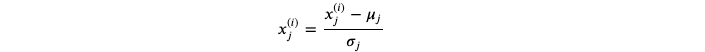
<br>
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
<br>
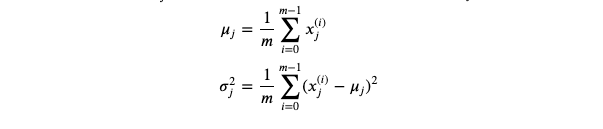

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.
<br>


In [89]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns, in a tuple:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # finds the mean of X column feature (operates at the column level), using numpy
    mu = np.mean(X, axis=0)                     # mu will have shape (n,), that is, vector not a matrix
    # find the standard deviation of each column/feature using numpy
    sigma = np.std(X, axis=0)                  # sigma will have shape (n,),  that is, vector not a matrix
    # Calculate the normalized input for the features by column
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

We can apply the z-scaling normalization below first without calling the method defined above, plot it, and observe how they are scaled into a new range of values, which is more evenly distributed (even for our quite small dataset):

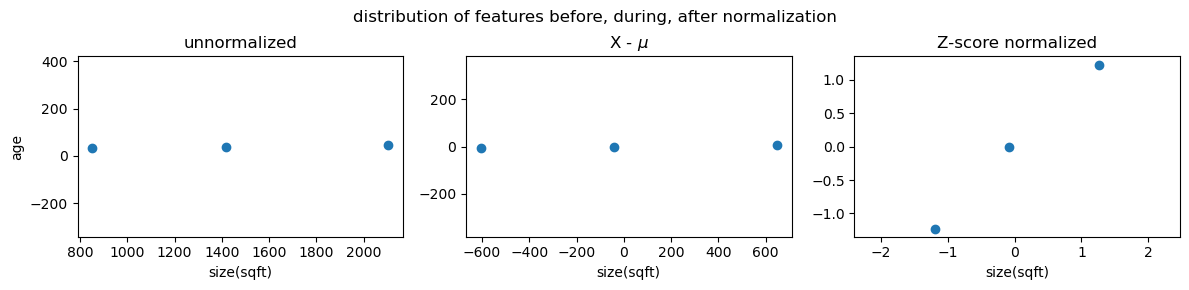

In [90]:
X_features = ['size(sqft)','bedrooms','floors','age']
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

We can now proceed to normalize the original features and compare them:

In [91]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.45733333e+03 3.33333333e+00 1.33333333e+00 4.00000000e+01], 
X_sigma = [5.11961804e+02 1.24721913e+00 4.71404521e-01 4.08248290e+00]
Peak to Peak range by column in Raw        X:[1252    3    1   10]
Peak to Peak range by column in Normalized X:[2.44549494 2.40535118 2.12132034 2.44948974]


The peak to peak range of the first column is reduced from a factor of thousands to a factor of 2-3 by normalization, whereas the other columns range is closer to 2 too(The peak-to-peak range is defined as the difference between the maximum and minimum values in a given set of data), which shows it forms a more evenly distributed range for the normalized features.

We can re-run our gradient descent algorithm with normalized data.
Note the **vastly larger value of alpha**. This will speed up gradient descent.

In [93]:
alpha_3 = 1.0e-1
w_norm, b_norm = gradient_descent(X_norm, y_train, initial_w, b, alpha_3, 1000, compute_cost)

Cost for ws: [11.72795825 12.08020813 -4.10121933 11.51260179] and b: 29.0 -> Total Cost: 37840.45516847248
Cost for ws: [19.91297363 20.58193728 -7.49706922 19.51680737] and b: 55.1 -> Total Cost: 29535.912920557774
Cost for ws: [ 25.61832198  26.57204831 -10.34593959  25.06857249] and b: 78.59 -> Total Cost: 23376.287632294396
Cost for ws: [ 29.5888802   30.79864141 -12.76414955  28.90733951] and b: 99.73100000000001 -> Total Cost: 18665.57660742267
Cost for ws: [ 32.34640051  33.78636699 -14.83799613  31.55077835] and b: 118.7579 -> Total Cost: 14986.774409045676
Cost for ws: [ 34.25628305  35.90323094 -16.6322531   33.36118217] and b: 135.88211 -> Total Cost: 12074.200027809633
Cost for ws: [ 35.57437236  37.40742071 -18.1961762   34.59199691] and b: 151.293899 -> Total Cost: 9748.067624152392
Cost for ws: [ 36.47975337  38.48012777 -19.5677557   35.42042771] and b: 165.1645091 -> Total Cost: 7880.148876868013
Cost for ws: [ 37.09773492  39.24855497 -20.77673633  35.97028724] and b

**Prediction**

The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. 
*Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized.*

In [94]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.50264166 -0.26726124 -0.70710678  0.        ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $281683


### Conclusions

In the above predicted value, we can conclude the normalized parameters are quite accurate if we think that in the original training dataset we have the following simlar values for one row [1416, 3, 2, 40] which had a target house price value of 232k, and above example predicted 281k
